In [1]:
#Se importan las librerias que se usarán en el trabajo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Se hace el cargue de la base principal que tiene la información de todos los siniestros en Bogotá de 2015 a 2019
archivo = 'C:/Users/USUARIO/Desktop/PROYECTO MCPP/Parte de Pyhton/SINIESTROS.xlsx'
siniestros = pd.read_excel(archivo)
print(siniestros["CODIGO_ACCIDENTE"].count())
siniestros.head()

196152


,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR
0,4401438,01/01/2015,01:05:00,2,2,NaN,NaN,KR 64A-CL 2C 02,16,2
1,4401449,01/01/2015,05:50:00,2,3,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,7,1
2,4401430,01/01/2015,07:15:00,2,3,NaN,NaN,KR 19D-CL 62 S 02,19,1
3,4401453,01/01/2015,09:30:00,3,1,1.0,NaN,KR 79-CL 42F S 71,8,1
4,4401423,01/01/2015,09:45:00,2,1,1.0,NaN,CL 66A-KR 76 02,10,2


In [12]:
#Se hace el cargue de la base con los mismos accidentes pero tiene las direcciones geocodificadas
#Inicialmente no estaba cargada en Datos abiertos con las cordenadas, una vez la actualizan se usa para completar el ejercicio
archivocsv = 'C:/Users/USUARIO/Desktop/PROYECTO MCPP/Parte de Pyhton/historico_siniestros_bogota_d.c_- (1).csv'
siniestroscsv = pd.read_csv(archivocsv)
print(siniestroscsv["CODIGO_ACCIDENTE"].count())
siniestroscsv.head()

199146


,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,-74.090924,4.693807,1,A000640275,4484660,2017/06/12 00:00:00+00,2017,AV AVENIDA BOYACA-CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,2017/06/12 05:30:00+00,4.693807,-74.090924,10006772.0,221236.0
1,-74.121000,4.603000,2,A001233353,10533499,2020/11/19 00:00:00+00,2020,CL 26 S- KR 50 02,CON HERIDOS,OTRO,PUENTE ARANDA,2020/11/19 02:05:00+00,4.603000,-74.121000,16004560.0,NaN
2,-74.042000,4.682000,4,A001232786,10533629,2020/11/10 00:00:00+00,2020,KR 9 - CL 100 02,SOLO DANOS,CHOQUE,USAQUEN,2020/11/10 13:30:00+00,4.682000,-74.042000,30001107.0,NaN
3,-74.166937,4.587187,7,A000200705,4412699,2015/05/11 00:00:00+00,2015,CL 63A-KR 72 S 02,SOLO DANOS,CHOQUE,CIUDAD BOLIVAR,2015/05/11 10:50:00+00,4.587187,-74.166937,19001483.0,136166.0
4,-74.092901,4.607648,8,A000402862,4447845,2016/06/08 00:00:00+00,2016,KR 27-CL 9 14,SOLO DANOS,CHOQUE,LOS MARTIRES,2016/06/08 21:30:00+00,4.607648,-74.092901,14000548.0,239719.0


In [3]:
#Se establece la columna de FECHA con formato de fecha para poder separar el mes y el año y luego poder hacer filtros
siniestros['FECHA']= pd.to_datetime(siniestros['FECHA']) 
siniestros['AÑO'] = siniestros['FECHA'].dt.year 
siniestros['MES'] = siniestros['FECHA'].dt.month
siniestros.head()

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,AÑO,MES
0,4401438,2015-01-01,01:05:00,2,2,NaN,NaN,KR 64A-CL 2C 02,16,2,2015,1
1,4401449,2015-01-01,05:50:00,2,3,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,7,1,2015,1
2,4401430,2015-01-01,07:15:00,2,3,NaN,NaN,KR 19D-CL 62 S 02,19,1,2015,1
3,4401453,2015-01-01,09:30:00,3,1,1.0,NaN,KR 79-CL 42F S 71,8,1,2015,1
4,4401423,2015-01-01,09:45:00,2,1,1.0,NaN,CL 66A-KR 76 02,10,2,2015,1


In [4]:
#Para poder tener el nombre de la localidad y no solo el código: 
#1. Se convierte la columna del código como numérica
#Se le asigna a cada código una categoría mediante el código pd.cut
#Como al dar categoría el siempre deja uno por fuera, se inicia con la categoría cero para que las 20 localidades las tome
siniestros["CODIGO_LOCALIDAD"] = pd.to_numeric(siniestros["CODIGO_LOCALIDAD"])
valores = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 , 20]
categorias = ["Usaquen", "Chapinero", "Santafe", "SanCristobal", "Usme", "Tunjuelito", "Bosa", "Kenedy", "Fontibon", "Engativa", "Suba", "BariosU", "Teusaquillo", "Martires", "AntonioN", "PuenteA", "Candelaria", "RafaelU", "CiudadB", "Sumapaz"]
siniestros["NombreLocalidad"] = pd.cut(x=siniestros["CODIGO_LOCALIDAD"], bins=valores, labels = categorias)
siniestros

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,AÑO,MES,NombreLocalidad
0,4401438,2015-01-01,01:05:00,2,2,NaN,NaN,KR 64A-CL 2C 02,16,2,2015,1,PuenteA
1,4401449,2015-01-01,05:50:00,2,3,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,7,1,2015,1,Bosa
2,4401430,2015-01-01,07:15:00,2,3,NaN,NaN,KR 19D-CL 62 S 02,19,1,2015,1,CiudadB
3,4401453,2015-01-01,09:30:00,3,1,1.0,NaN,KR 79-CL 42F S 71,8,1,2015,1,Kenedy
4,4401423,2015-01-01,09:45:00,2,1,1.0,NaN,CL 66A-KR 76 02,10,2,2015,1,Engativa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196147,10530481,2020-12-31,21:20:00,3,1,1.0,NaN,CL 42-KR 86 S 02,8,1,2020,12,Kenedy
196148,10530439,2020-12-31,21:30:00,2,1,1.0,NaN,KR 111-CL 171 02,11,2,2020,12,Suba
196149,10530491,2020-12-31,21:34:00,3,1,1.0,NaN,CL 134-KR 5 08,1,1,2020,12,Usaquen
196150,10531380,2020-12-31,21:40:00,2,1,1.0,NaN,CL 142 - KR 146 02,11,1,2020,12,Suba


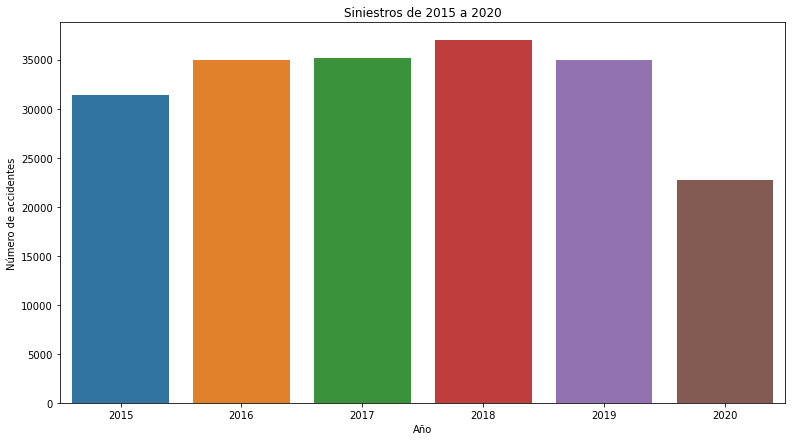

In [5]:
#Como primer acercamiento a los datos se grafica en barra el número de siniestros por año, por lo cual se hace un groupby 
plt.figure(figsize=(13,7)) 
cuenta = siniestros.groupby(["AÑO"]).count()
cuenta = cuenta.rename_axis('AÑO').reset_index()
sns.barplot(x = cuenta["AÑO"], y = cuenta["NombreLocalidad"]).set_title("Siniestros de 2015 a 2020");
plt.ylabel("Número de accidentes") 
plt.xlabel("Año");

In [6]:
#Se confirma que el groupby que se hizo tenga los 196mil siniestros de Bogotá entre 2015 y 2020
print(sum(cuenta["CODIGO_ACCIDENTE"]))
cuenta

196152


,AÑO,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,MES,NombreLocalidad
0,2015,31341,31341,31341,31341,31341,26211,1124,31341,31341,31341,31341,31341
1,2016,34988,34988,34988,34988,34988,29995,1043,34988,34988,34988,34988,34988
2,2017,35171,35171,35171,35171,35171,30477,989,35171,35171,35171,35171,35171
3,2018,36953,36953,36953,36953,36953,31601,1148,36953,36953,36953,36953,36953
4,2019,34990,34990,34990,34990,34990,29727,1210,34990,34990,34990,34990,34990
5,2020,22709,22709,22709,22709,22709,19899,1175,22709,22709,22709,22709,22709


In [7]:
#Para revisar el comportamiento de los siniestros por localidad, se hace un groupby 
cuenta_2 = siniestros.groupby(["NombreLocalidad"]).count()
cuenta_2 = cuenta_2.rename_axis('NombreLocalidad').reset_index()
print(sum(cuenta_2["CODIGO_ACCIDENTE"]))
cuenta_2

196152


,NombreLocalidad,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,AÑO,MES
0,Usaquen,19621,19621,19621,19621,19621,17799,637,19621,19621,19621,19621,19621
1,Chapinero,11502,11502,11502,11502,11502,10297,382,11502,11502,11502,11502,11502
2,Santafe,5648,5648,5648,5648,5648,4372,228,5648,5648,5648,5648,5648
3,SanCristobal,5460,5460,5460,5460,5460,4056,372,5460,5460,5460,5460,5460
4,Usme,4026,4026,4026,4026,4026,2884,235,4026,4026,4026,4026,4026
5,Tunjuelito,5494,5494,5494,5494,5494,4545,177,5494,5494,5494,5494,5494
6,Bosa,9684,9684,9684,9684,9684,7828,262,9684,9684,9684,9684,9684
7,Kenedy,22282,22282,22282,22282,22282,18403,630,22282,22282,22282,22282,22282
8,Fontibon,15598,15598,15598,15598,15598,14179,474,15598,15598,15598,15598,15598
9,Engativa,19777,19777,19777,19777,19777,17377,592,19777,19777,19777,19777,19777


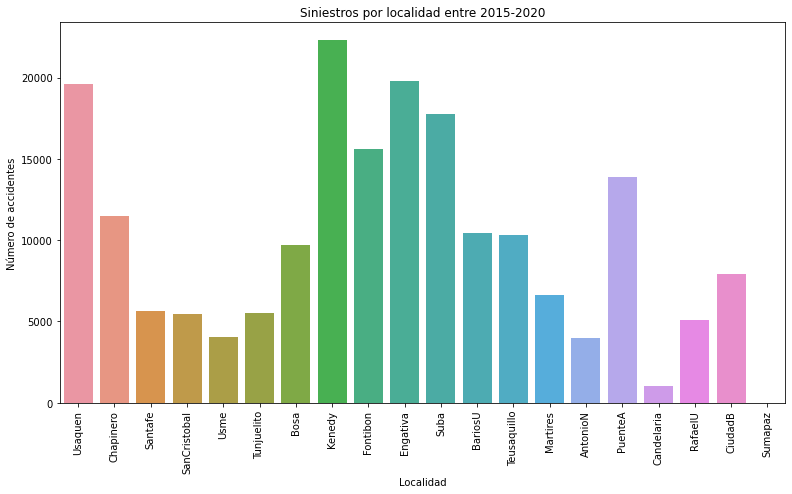

In [8]:
#Se grafica el número de siniestros por localidad en BOgotá
plt.figure(figsize=(13,7)) 
sns.barplot(x = cuenta_2["NombreLocalidad"], y = cuenta_2["CODIGO_ACCIDENTE"], ).set_title("Siniestros por localidad entre 2015-2020");
plt.ylabel("Número de accidentes") 
plt.xlabel("Localidad")
plt.xticks(rotation=90);

In [9]:
#Teniendo en cuenta el comportamiento de los siniestros, con una tendencia positiva entre 2015 y 2018, un leve amento en 2019 
# Filtro los datos para estudiar el comportamiento de los siniestros este año. 
siniestros2019 = siniestros['AÑO'] == 2019
siniestros_2019 = siniestros[siniestros2019]
siniestros_2019

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,AÑO,MES,NombreLocalidad
138453,10471938,2019-01-01,00:00:00,3,1,1.0,NaN,CL 1A-TR 52ABIS 2,16,1,2019,1,PuenteA
138454,10471904,2019-01-01,00:30:00,1,2,NaN,NaN,AV AVENIDA BOYACA-CL 60 S 05,19,1,2019,1,CiudadB
138455,10471949,2019-01-01,00:30:00,3,1,1.0,NaN,CL 130D-KR 94 2,11,1,2019,1,Suba
138456,10471900,2019-01-01,02:30:00,3,1,1.0,NaN,AV AVENIDA CIUDAD DE QUITO-CL 45 2,13,1,2019,1,Teusaquillo
138457,10471941,2019-01-01,03:00:00,3,1,1.0,NaN,CL 132-KR 49 2,11,2,2019,1,Suba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173438,10507433,2019-12-31,21:00:00,3,1,1.0,NaN,CL 33A-KR 16 02,13,2,2019,12,Teusaquillo
173439,10507450,2019-12-31,21:00:00,3,1,1.0,NaN,AV AVENIDA CIUDAD DE VILLAVICENCIO-TR 69 02,19,1,2019,12,CiudadB
173440,10507374,2019-12-31,22:40:00,2,2,NaN,NaN,AV AVENIDA PRIMERO DE MAYO-KR 24 2,15,1,2019,12,AntonioN
173441,10507448,2019-12-31,22:40:00,3,1,1.0,NaN,CL 138-KR 151 2,11,1,2019,12,Suba


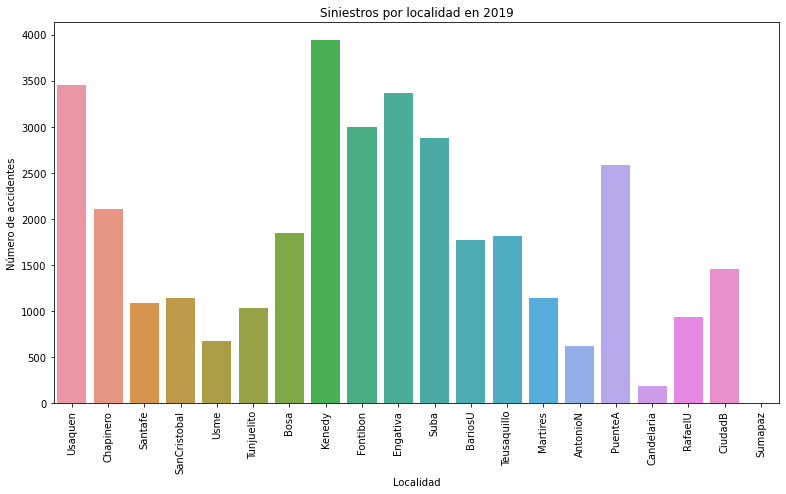

In [10]:
#Se grafica el número de accidentes por localidad solo en el 2019
plt.figure(figsize=(13,7)) 
cuenta_2019 = siniestros_2019.groupby(["NombreLocalidad"]).count()
cuenta_2019 = cuenta_2019.rename_axis('NombreLocalidad').reset_index()
sns.barplot(x = cuenta_2019["NombreLocalidad"], y = cuenta_2019["CODIGO_ACCIDENTE"], ).set_title("Siniestros por localidad en 2019");
plt.ylabel("Número de accidentes") 
plt.xlabel("Localidad")
plt.xticks(rotation=90);

In [13]:
SINIESTROS2019=pd.merge(siniestros_2019, siniestroscsv, how='inner', on=["CODIGO_ACCIDENTE"])
pd.set_option('max_columns', None)
SINIESTROS2019 = SINIESTROS2019.drop(['GRAVEDAD_x', "DIRECCION_y","FECHA_OCURRENCIA_ACC","ANO_OCURRENCIA_ACC", "LOCALIDAD", "FECHA_HORA_ACC", "PK_CALZADA", "FORMULARIO", "CIV" ], axis=1)
SINIESTROS2019

,CODIGO_ACCIDENTE,FECHA,HORA,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION_x,CODIGO_LOCALIDAD,DISENO_LUGAR,AÑO,MES,NombreLocalidad,X,Y,OBJECTID,GRAVEDAD_y,CLASE_ACC,LATITUD,LONGITUD
0,10471938,2019-01-01,00:00:00,1,1.0,NaN,CL 1A-TR 52ABIS 2,16,1,2019,1,PuenteA,-74.119630,4.611262,285565,SOLO DANOS,CHOQUE,4.611262,-74.119630
1,10471904,2019-01-01,00:30:00,2,NaN,NaN,AV AVENIDA BOYACA-CL 60 S 05,19,1,2019,1,CiudadB,-74.139050,4.562410,285234,CON MUERTOS,ATROPELLO,4.562410,-74.139050
2,10471949,2019-01-01,00:30:00,1,1.0,NaN,CL 130D-KR 94 2,11,1,2019,1,Suba,-74.090710,4.729053,285794,SOLO DANOS,CHOQUE,4.729053,-74.090710
3,10471900,2019-01-01,02:30:00,1,1.0,NaN,AV AVENIDA CIUDAD DE QUITO-CL 45 2,13,1,2019,1,Teusaquillo,-74.079311,4.634812,345492,SOLO DANOS,CHOQUE,4.634812,-74.079311
4,10471941,2019-01-01,03:00:00,1,1.0,NaN,CL 132-KR 49 2,11,2,2019,1,Suba,-74.055592,4.718403,285791,SOLO DANOS,CHOQUE,4.718403,-74.055592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32956,10507433,2019-12-31,21:00:00,1,1.0,NaN,CL 33A-KR 16 02,13,2,2019,12,Teusaquillo,-74.071475,4.622455,314661,SOLO DANOS,CHOQUE,4.622455,-74.071475
32957,10507450,2019-12-31,21:00:00,1,1.0,NaN,AV AVENIDA CIUDAD DE VILLAVICENCIO-TR 69 02,19,1,2019,12,CiudadB,-74.158381,4.582136,351718,SOLO DANOS,CHOQUE,4.582136,-74.158381
32958,10507374,2019-12-31,22:40:00,2,NaN,NaN,AV AVENIDA PRIMERO DE MAYO-KR 24 2,15,1,2019,12,AntonioN,-74.105097,4.584503,349869,CON HERIDOS,ATROPELLO,4.584503,-74.105097
32959,10507448,2019-12-31,22:40:00,1,1.0,NaN,CL 138-KR 151 2,11,1,2019,12,Suba,-74.121877,4.746055,311084,SOLO DANOS,CHOQUE,4.746055,-74.121877


In [14]:
#Cargamos la base que incluye el tipo de vehículo que estuvo involucrado en el siniestro y se realiza el mismo procedimeinto
#Para separar el año y el mes y dar categoría a los vehículos 
archivo_2 = 'C:/Users/USUARIO/Desktop/PROYECTO MCPP/Parte de Pyhton/VEHICULOS.xlsx'
vehiculos = pd.read_excel(archivo_2)
vehiculos['FECHA']= pd.to_datetime(vehiculos['FECHA']) 
vehiculos['AÑO'] = vehiculos['FECHA'].dt.year 
vehiculos['MES'] = vehiculos['FECHA'].dt.month
valores1 = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 17, 24, 28]
categorias1 = ["Automovil", "Bus", "Buseta", "Camión", "Camioneta", "Campero", "Microbus", "Tractocamion", "Volqueta","Motocicleta","Bicicleta","Motocarro","Motociclo","Cuatrimoto","Bicitaxi"]
vehiculos["ClaseVehiculo"] = pd.cut(x=vehiculos["CLASE"], bins=valores1, labels = categorias1)
vehiculos.head()

,CODIGO_ACCIDENTE,FECHA,VEHICULO,CLASE,SERVICIO,MODALIDAD,ENFUGA,AÑO,MES,ClaseVehiculo
0,4401423,2015-01-01,4401423-1,1.0,2.0,5.0,N,2015,1,Automovil
1,4401423,2015-01-01,4401423-2,1.0,3.0,NaN,N,2015,1,Automovil
2,4401420,2015-01-01,4401420-1,1.0,2.0,5.0,N,2015,1,Automovil
3,4401420,2015-01-01,4401420-2,1.0,3.0,NaN,N,2015,1,Automovil
4,4401429,2015-01-01,4401429-1,7.0,2.0,4.0,N,2015,1,Microbus


In [15]:
#Se filtra para tener los siniestros de 2019 por vehiculo 
vehiculos_2019 = vehiculos['AÑO'] == 2019
vehiculos2019 = vehiculos[vehiculos_2019]
vehiculos2019

,CODIGO_ACCIDENTE,FECHA,VEHICULO,CLASE,SERVICIO,MODALIDAD,ENFUGA,AÑO,MES,ClaseVehiculo
262211,10471900,2019-01-01,10471900-1,1.0,3.0,NaN,N,2019,1,Automovil
262212,10471900,2019-01-01,10471900-2,1.0,3.0,NaN,N,2019,1,Automovil
262213,10471901,2019-01-01,10471901-1,1.0,3.0,NaN,N,2019,1,Automovil
262214,10471901,2019-01-01,10471901-2,10.0,3.0,NaN,N,2019,1,Motocicleta
262215,10471904,2019-01-01,10471904-1,1.0,2.0,5.0,N,2019,1,Automovil
...,...,...,...,...,...,...,...,...,...,...
328385,10507452,2019-12-31,10507452-3,1.0,3.0,NaN,N,2019,12,Automovil
328386,10507268,2019-12-31,10507268-1,1.0,3.0,NaN,N,2019,12,Automovil
328387,10507308,2019-12-31,10507308-1,1.0,3.0,NaN,N,2019,12,Automovil
328388,10507308,2019-12-31,10507308-2,6.0,3.0,NaN,N,2019,12,Campero


In [16]:
#De igual manera se filtra los Siniestros en 2019 que tuvieron involucradas bicicletas 
bici = vehiculos2019['CLASE'] == 13.0 
Bici2019 = vehiculos2019[bici]
Bici2019

,CODIGO_ACCIDENTE,FECHA,VEHICULO,CLASE,SERVICIO,MODALIDAD,ENFUGA,AÑO,MES,ClaseVehiculo
262253,10471956,2019-01-01,10471956-2,13.0,NaN,NaN,N,2019,1,Bicicleta
262261,10471994,2019-01-01,10471994-1,13.0,NaN,NaN,N,2019,1,Bicicleta
262273,10472111,2019-01-01,10472111-2,13.0,NaN,NaN,N,2019,1,Bicicleta
262283,10484682,2019-01-01,10484682-2,13.0,NaN,NaN,N,2019,1,Bicicleta
262284,10471902,2019-02-01,10471902-1,13.0,NaN,NaN,N,2019,2,Bicicleta
...,...,...,...,...,...,...,...,...,...,...
328187,10507391,2019-12-30,10507391-2,13.0,NaN,NaN,N,2019,12,Bicicleta
328188,10507391,2019-12-30,10507391-3,13.0,NaN,NaN,N,2019,12,Bicicleta
328230,10507225,2019-12-30,10507225-2,13.0,NaN,NaN,N,2019,12,Bicicleta
328290,10507370,2019-12-31,10507370-2,13.0,NaN,NaN,N,2019,12,Bicicleta


In [17]:
#Se carga el archivo que relaciona los actores que estuvieron involucrados en el siiestro y se separa el año y el mes
archivo_3 = 'C:/Users/USUARIO/Desktop/PROYECTO MCPP/Parte de Pyhton/ACTOR_VIAL.xlsx'
actor = pd.read_excel(archivo_3)
actor['FECHA']= pd.to_datetime(actor['FECHA'])  
actor['AÑO'] = actor['FECHA'].dt.year 
actor['MES'] = actor['FECHA'].dt.month
actor.head()

,CODIGO_ACCIDENTE,CODIGO_ACCIDENTADO,FECHA,CONDICION,ESTADO,EDAD,SEXO,VEHICULO,AÑO,MES
0,4401447,2452576,2015-01-01,CONDUCTOR,ILESO,44,FEMENINO,4401447-1,2015,1
1,4401447,2452577,2015-01-01,CONDUCTOR,ILESO,31,MASCULINO,4401447-2,2015,1
2,4401453,2452586,2015-01-01,CONDUCTOR,ILESO,47,MASCULINO,4401453-1,2015,1
3,4401453,2452587,2015-01-01,CONDUCTOR,ILESO,29,MASCULINO,4401453-2,2015,1
4,4401423,2452500,2015-01-01,CONDUCTOR,HERIDO,44,MASCULINO,4401423-1,2015,1


In [19]:
#Se filtra la base para tener los siniestros del 2015 al 2020 con menores de edad involucrados
actor = actor.drop(actor[actor['EDAD']=="SIN INFORMACION"].index)
actor["EDAD"] = pd.to_numeric(actor["EDAD"])
Edad = actor['EDAD'] < 18
Edad_completo = actor[Edad]
Edad_completo

,CODIGO_ACCIDENTE,CODIGO_ACCIDENTADO,FECHA,CONDICION,ESTADO,EDAD,SEXO,VEHICULO,AÑO,MES
18,4401438,2452537,2015-01-01,PEATON,HERIDO,9,MASCULINO,NaN,2015,1
31,4401452,2452579,2015-02-01,PASAJERO/ACOMPAÑANTE,HERIDO,8,FEMENINO,4401452-1,2015,2
71,4401495,2452661,2015-02-01,CICLISTA,HERIDO,16,MASCULINO,4401495-2,2015,2
114,4401421,2452502,2015-02-01,PEATON,HERIDO,17,MASCULINO,NaN,2015,2
128,4401428,2452525,2015-02-01,PASAJERO/ACOMPAÑANTE,HERIDO,16,FEMENINO,4401428-1,2015,2
...,...,...,...,...,...,...,...,...,...,...
422299,10530411,12728816,2020-12-30,PASAJERO/ACOMPAÑANTE,HERIDO,8,FEMENINO,10530411-1,2020,12
422300,10530411,12728817,2020-12-30,PASAJERO/ACOMPAÑANTE,HERIDO,12,MASCULINO,10530411-1,2020,12
422301,10530411,12728818,2020-12-30,PASAJERO/ACOMPAÑANTE,HERIDO,11,FEMENINO,10530411-1,2020,12
422359,10530460,12728731,2020-12-31,CONDUCTOR,ILESO,16,MASCULINO,10530460-2,2020,12


In [20]:
#Se filtran los siniestros para 2019 con menores de edad involucrados
Menores2019 = Edad_completo['AÑO'] == 2019
menores2019 = Edad_completo[Menores2019]
menores2019

,CODIGO_ACCIDENTE,CODIGO_ACCIDENTADO,FECHA,CONDICION,ESTADO,EDAD,SEXO,VEHICULO,AÑO,MES
298453,10471906,12604000,2019-01-01,PASAJERO/ACOMPAÑANTE,HERIDO,13,FEMENINO,10471906-1,2019,1
298505,10471980,12604173,2019-01-01,PASAJERO/ACOMPAÑANTE,HERIDO,0,FEMENINO,10471980-1,2019,1
298506,10471980,12604174,2019-01-01,PASAJERO/ACOMPAÑANTE,HERIDO,3,MASCULINO,10471980-1,2019,1
298517,10472107,12604381,2019-01-01,CONDUCTOR,HERIDO,17,MASCULINO,10472107-1,2019,1
298543,10471914,12604015,2019-02-01,MOTOCICLISTA,HERIDO,17,MASCULINO,10471914-1,2019,2
...,...,...,...,...,...,...,...,...,...,...
373770,10507061,12679545,2019-12-29,PASAJERO/ACOMPAÑANTE,HERIDO,15,FEMENINO,10507061-1,2019,12
373772,10507061,12679547,2019-12-29,PASAJERO/ACOMPAÑANTE,HERIDO,8,FEMENINO,10507061-1,2019,12
373793,10507225,12679876,2019-12-30,CICLISTA,HERIDO,14,MASCULINO,10507225-2,2019,12
373901,10507375,12680179,2019-12-30,PEATON,HERIDO,16,FEMENINO,NaN,2019,12


In [21]:
#Se carga el archivo que relaciona la causa o hipótesis de cada siniestro
archivo_4 = 'C:/Users/USUARIO/Desktop/PROYECTO MCPP/Parte de Pyhton/HIPOTESIS.xlsx'
hipotesis = pd.read_excel(archivo_4)
hipotesis['FECHA']= pd.to_datetime(hipotesis['FECHA']) 
hipotesis['AÑO'] = hipotesis['FECHA'].dt.year 
hipotesis['MES'] = hipotesis['FECHA'].dt.month
hipotesis.head()

,CODIGO_ACCIDENTE,FECHA,CODIGO_CAUSA,AÑO,MES
0,4401425,2015-01-01,115,2015,1
1,4401437,2015-01-01,104,2015,1
2,4401453,2015-01-01,157,2015,1
3,4401423,2015-01-01,112,2015,1
4,4401430,2015-01-01,157,2015,1


In [22]:
#Merge para unir siniestros del 2019 con su hipótesis
df1=pd.merge(SINIESTROS2019, hipotesis, how='inner', on=["CODIGO_ACCIDENTE", "FECHA", "AÑO", "MES"])
df1.head()

,CODIGO_ACCIDENTE,FECHA,HORA,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION_x,CODIGO_LOCALIDAD,DISENO_LUGAR,AÑO,MES,NombreLocalidad,X,Y,OBJECTID,GRAVEDAD_y,CLASE_ACC,LATITUD,LONGITUD,CODIGO_CAUSA
0,10471938,2019-01-01,00:00:00,1,1.0,NaN,CL 1A-TR 52ABIS 2,16,1,2019,1,PuenteA,-74.119630,4.611262,285565,SOLO DANOS,CHOQUE,4.611262,-74.119630,115
1,10471904,2019-01-01,00:30:00,2,NaN,NaN,AV AVENIDA BOYACA-CL 60 S 05,19,1,2019,1,CiudadB,-74.139050,4.562410,285234,CON MUERTOS,ATROPELLO,4.562410,-74.139050,116
2,10471949,2019-01-01,00:30:00,1,1.0,NaN,CL 130D-KR 94 2,11,1,2019,1,Suba,-74.090710,4.729053,285794,SOLO DANOS,CHOQUE,4.729053,-74.090710,145
3,10471900,2019-01-01,02:30:00,1,1.0,NaN,AV AVENIDA CIUDAD DE QUITO-CL 45 2,13,1,2019,1,Teusaquillo,-74.079311,4.634812,345492,SOLO DANOS,CHOQUE,4.634812,-74.079311,157
4,10471900,2019-01-01,02:30:00,1,1.0,NaN,AV AVENIDA CIUDAD DE QUITO-CL 45 2,13,1,2019,1,Teusaquillo,-74.079311,4.634812,345492,SOLO DANOS,CHOQUE,4.634812,-74.079311,157


In [23]:
#Se añade al merge la base que tiene los vehículos de 2019
df2=pd.merge(df1, vehiculos2019, how='right', on=["CODIGO_ACCIDENTE", "FECHA", "AÑO", "MES"])
df2.head()

,CODIGO_ACCIDENTE,FECHA,HORA,CLASE_x,CHOQUE,OBJETO_FIJO,DIRECCION_x,CODIGO_LOCALIDAD,DISENO_LUGAR,AÑO,MES,NombreLocalidad,X,Y,OBJECTID,GRAVEDAD_y,CLASE_ACC,LATITUD,LONGITUD,CODIGO_CAUSA,VEHICULO,CLASE_y,SERVICIO,MODALIDAD,ENFUGA,ClaseVehiculo
0,10471900,2019-01-01,02:30:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE QUITO-CL 45 2,13.0,1.0,2019,1,Teusaquillo,-74.079311,4.634812,345492.0,SOLO DANOS,CHOQUE,4.634812,-74.079311,157.0,10471900-1,1.0,3.0,NaN,N,Automovil
1,10471900,2019-01-01,02:30:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE QUITO-CL 45 2,13.0,1.0,2019,1,Teusaquillo,-74.079311,4.634812,345492.0,SOLO DANOS,CHOQUE,4.634812,-74.079311,157.0,10471900-1,1.0,3.0,NaN,N,Automovil
2,10471900,2019-01-01,02:30:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE QUITO-CL 45 2,13.0,1.0,2019,1,Teusaquillo,-74.079311,4.634812,345492.0,SOLO DANOS,CHOQUE,4.634812,-74.079311,157.0,10471900-2,1.0,3.0,NaN,N,Automovil
3,10471900,2019-01-01,02:30:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE QUITO-CL 45 2,13.0,1.0,2019,1,Teusaquillo,-74.079311,4.634812,345492.0,SOLO DANOS,CHOQUE,4.634812,-74.079311,157.0,10471900-2,1.0,3.0,NaN,N,Automovil
4,10471901,2019-01-01,06:25:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE CALI-CL 10 2,8.0,2.0,2019,1,Kenedy,-74.146956,4.649141,311879.0,CON HERIDOS,CHOQUE,4.649141,-74.146956,121.0,10471901-1,1.0,3.0,NaN,N,Automovil


In [25]:
#Se hace merge con los siniestros con menores en 2019 de manera tal que solo queda información para esta población
df3=pd.merge(df2, menores2019, how='right', on=["CODIGO_ACCIDENTE", "FECHA", "AÑO", "MES"])
pd.set_option('max_columns', None)
df3

,CODIGO_ACCIDENTE,FECHA,HORA,CLASE_x,CHOQUE,OBJETO_FIJO,DIRECCION_x,CODIGO_LOCALIDAD,DISENO_LUGAR,AÑO,MES,NombreLocalidad,X,Y,OBJECTID,GRAVEDAD_y,CLASE_ACC,LATITUD,LONGITUD,CODIGO_CAUSA,VEHICULO_x,CLASE_y,SERVICIO,MODALIDAD,ENFUGA,ClaseVehiculo,CODIGO_ACCIDENTADO,CONDICION,ESTADO,EDAD,SEXO,VEHICULO_y
0,10471906,2019-01-01,06:25:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE VILLAVICENCIO-KR 80 2,8.0,2.0,2019,1,Kenedy,-74.166068,4.621049,345516.0,CON HERIDOS,CHOQUE,4.621049,-74.166068,114.0,10471906-1,10.0,3.0,NaN,N,Motocicleta,12604000,PASAJERO/ACOMPAÑANTE,HERIDO,13,FEMENINO,10471906-1
1,10471906,2019-01-01,06:25:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE VILLAVICENCIO-KR 80 2,8.0,2.0,2019,1,Kenedy,-74.166068,4.621049,345516.0,CON HERIDOS,CHOQUE,4.621049,-74.166068,112.0,10471906-1,10.0,3.0,NaN,N,Motocicleta,12604000,PASAJERO/ACOMPAÑANTE,HERIDO,13,FEMENINO,10471906-1
2,10471906,2019-01-01,06:25:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE VILLAVICENCIO-KR 80 2,8.0,2.0,2019,1,Kenedy,-74.166068,4.621049,345516.0,CON HERIDOS,CHOQUE,4.621049,-74.166068,114.0,10471906-2,10.0,3.0,NaN,N,Motocicleta,12604000,PASAJERO/ACOMPAÑANTE,HERIDO,13,FEMENINO,10471906-1
3,10471906,2019-01-01,06:25:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE VILLAVICENCIO-KR 80 2,8.0,2.0,2019,1,Kenedy,-74.166068,4.621049,345516.0,CON HERIDOS,CHOQUE,4.621049,-74.166068,112.0,10471906-2,10.0,3.0,NaN,N,Motocicleta,12604000,PASAJERO/ACOMPAÑANTE,HERIDO,13,FEMENINO,10471906-1
4,10471980,2019-01-01,10:47:00,1.0,1.0,NaN,CL 100-KR 57 2,12.0,2.0,2019,1,BariosU,-74.064194,4.688627,284984.0,CON HERIDOS,CHOQUE,4.688627,-74.064194,157.0,10471980-1,5.0,3.0,NaN,N,Camioneta,12604173,PASAJERO/ACOMPAÑANTE,HERIDO,0,FEMENINO,10471980-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,10507061,2019-12-29,21:40:00,1.0,1.0,NaN,AK 68-CL 5 17,16.0,1.0,2019,12,PuenteA,-74.123344,4.627052,365674.0,CON HERIDOS,CHOQUE,4.627052,-74.123344,121.0,10507061-2,5.0,2.0,7.0,N,Camioneta,12679547,PASAJERO/ACOMPAÑANTE,HERIDO,8,FEMENINO,10507061-1
3887,10507225,2019-12-30,19:25:00,1.0,1.0,NaN,CL 48-KR 2B S 02,18.0,1.0,2019,12,RafaelU,-74.102016,4.551581,357721.0,CON HERIDOS,CHOQUE,4.551581,-74.102016,90.0,10507225-1,9.0,2.0,11.0,N,Volqueta,12679876,CICLISTA,HERIDO,14,MASCULINO,10507225-2
3888,10507225,2019-12-30,19:25:00,1.0,1.0,NaN,CL 48-KR 2B S 02,18.0,1.0,2019,12,RafaelU,-74.102016,4.551581,357721.0,CON HERIDOS,CHOQUE,4.551581,-74.102016,90.0,10507225-2,13.0,NaN,NaN,N,Bicicleta,12679876,CICLISTA,HERIDO,14,MASCULINO,10507225-2
3889,10507375,2019-12-30,11:30:00,2.0,NaN,NaN,CL 48-KR 1G S 15,18.0,1.0,2019,12,RafaelU,-74.106400,4.546700,231158.0,CON HERIDOS,ATROPELLO,4.546700,-74.106400,404.0,10507375-1,1.0,3.0,NaN,N,Automovil,12680179,PEATON,HERIDO,16,FEMENINO,NaN


In [26]:
#Se eliminan columnas repetidas o que no se necesita
df = df3.drop(['VEHICULO_x'], axis=1)

In [27]:
#Se renombran columnas de manera que luego en Qgis coincidan columnas como nombre localidad o codigo localidad
df.rename(columns = {"CLASE_x": "CLASE_SIN", "CODIGO_LOCALIDAD": "LocCodigo", "VEHICULO_y": "VEHICULO", "CLASE_y": "CLASE_VEHI"}, inplace = True)
df

,CODIGO_ACCIDENTE,FECHA,HORA,CLASE_SIN,CHOQUE,OBJETO_FIJO,DIRECCION_x,LocCodigo,DISENO_LUGAR,AÑO,MES,NombreLocalidad,X,Y,OBJECTID,GRAVEDAD_y,CLASE_ACC,LATITUD,LONGITUD,CODIGO_CAUSA,CLASE_VEHI,SERVICIO,MODALIDAD,ENFUGA,ClaseVehiculo,CODIGO_ACCIDENTADO,CONDICION,ESTADO,EDAD,SEXO,VEHICULO
0,10471906,2019-01-01,06:25:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE VILLAVICENCIO-KR 80 2,8.0,2.0,2019,1,Kenedy,-74.166068,4.621049,345516.0,CON HERIDOS,CHOQUE,4.621049,-74.166068,114.0,10.0,3.0,NaN,N,Motocicleta,12604000,PASAJERO/ACOMPAÑANTE,HERIDO,13,FEMENINO,10471906-1
1,10471906,2019-01-01,06:25:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE VILLAVICENCIO-KR 80 2,8.0,2.0,2019,1,Kenedy,-74.166068,4.621049,345516.0,CON HERIDOS,CHOQUE,4.621049,-74.166068,112.0,10.0,3.0,NaN,N,Motocicleta,12604000,PASAJERO/ACOMPAÑANTE,HERIDO,13,FEMENINO,10471906-1
2,10471906,2019-01-01,06:25:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE VILLAVICENCIO-KR 80 2,8.0,2.0,2019,1,Kenedy,-74.166068,4.621049,345516.0,CON HERIDOS,CHOQUE,4.621049,-74.166068,114.0,10.0,3.0,NaN,N,Motocicleta,12604000,PASAJERO/ACOMPAÑANTE,HERIDO,13,FEMENINO,10471906-1
3,10471906,2019-01-01,06:25:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE VILLAVICENCIO-KR 80 2,8.0,2.0,2019,1,Kenedy,-74.166068,4.621049,345516.0,CON HERIDOS,CHOQUE,4.621049,-74.166068,112.0,10.0,3.0,NaN,N,Motocicleta,12604000,PASAJERO/ACOMPAÑANTE,HERIDO,13,FEMENINO,10471906-1
4,10471980,2019-01-01,10:47:00,1.0,1.0,NaN,CL 100-KR 57 2,12.0,2.0,2019,1,BariosU,-74.064194,4.688627,284984.0,CON HERIDOS,CHOQUE,4.688627,-74.064194,157.0,5.0,3.0,NaN,N,Camioneta,12604173,PASAJERO/ACOMPAÑANTE,HERIDO,0,FEMENINO,10471980-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,10507061,2019-12-29,21:40:00,1.0,1.0,NaN,AK 68-CL 5 17,16.0,1.0,2019,12,PuenteA,-74.123344,4.627052,365674.0,CON HERIDOS,CHOQUE,4.627052,-74.123344,121.0,5.0,2.0,7.0,N,Camioneta,12679547,PASAJERO/ACOMPAÑANTE,HERIDO,8,FEMENINO,10507061-1
3887,10507225,2019-12-30,19:25:00,1.0,1.0,NaN,CL 48-KR 2B S 02,18.0,1.0,2019,12,RafaelU,-74.102016,4.551581,357721.0,CON HERIDOS,CHOQUE,4.551581,-74.102016,90.0,9.0,2.0,11.0,N,Volqueta,12679876,CICLISTA,HERIDO,14,MASCULINO,10507225-2
3888,10507225,2019-12-30,19:25:00,1.0,1.0,NaN,CL 48-KR 2B S 02,18.0,1.0,2019,12,RafaelU,-74.102016,4.551581,357721.0,CON HERIDOS,CHOQUE,4.551581,-74.102016,90.0,13.0,NaN,NaN,N,Bicicleta,12679876,CICLISTA,HERIDO,14,MASCULINO,10507225-2
3889,10507375,2019-12-30,11:30:00,2.0,NaN,NaN,CL 48-KR 1G S 15,18.0,1.0,2019,12,RafaelU,-74.106400,4.546700,231158.0,CON HERIDOS,ATROPELLO,4.546700,-74.106400,404.0,1.0,3.0,NaN,N,Automovil,12680179,PEATON,HERIDO,16,FEMENINO,NaN


In [28]:
#Debido a que quedaron varias observaciones por código de accidentado se eliminan los duplicados tanto para cada siniestro
df = df.drop_duplicates(['CODIGO_ACCIDENTE', 'CODIGO_ACCIDENTADO'], keep='first')
df

,CODIGO_ACCIDENTE,FECHA,HORA,CLASE_SIN,CHOQUE,OBJETO_FIJO,DIRECCION_x,LocCodigo,DISENO_LUGAR,AÑO,MES,NombreLocalidad,X,Y,OBJECTID,GRAVEDAD_y,CLASE_ACC,LATITUD,LONGITUD,CODIGO_CAUSA,CLASE_VEHI,SERVICIO,MODALIDAD,ENFUGA,ClaseVehiculo,CODIGO_ACCIDENTADO,CONDICION,ESTADO,EDAD,SEXO,VEHICULO
0,10471906,2019-01-01,06:25:00,1.0,1.0,NaN,AV AVENIDA CIUDAD DE VILLAVICENCIO-KR 80 2,8.0,2.0,2019,1,Kenedy,-74.166068,4.621049,345516.0,CON HERIDOS,CHOQUE,4.621049,-74.166068,114.0,10.0,3.0,NaN,N,Motocicleta,12604000,PASAJERO/ACOMPAÑANTE,HERIDO,13,FEMENINO,10471906-1
4,10471980,2019-01-01,10:47:00,1.0,1.0,NaN,CL 100-KR 57 2,12.0,2.0,2019,1,BariosU,-74.064194,4.688627,284984.0,CON HERIDOS,CHOQUE,4.688627,-74.064194,157.0,5.0,3.0,NaN,N,Camioneta,12604173,PASAJERO/ACOMPAÑANTE,HERIDO,0,FEMENINO,10471980-1
8,10471980,2019-01-01,10:47:00,1.0,1.0,NaN,CL 100-KR 57 2,12.0,2.0,2019,1,BariosU,-74.064194,4.688627,284984.0,CON HERIDOS,CHOQUE,4.688627,-74.064194,157.0,5.0,3.0,NaN,N,Camioneta,12604174,PASAJERO/ACOMPAÑANTE,HERIDO,3,MASCULINO,10471980-1
12,10472107,2019-01-01,15:05:00,1.0,1.0,NaN,CL 37-KR 6 SE 2,4.0,2.0,2019,1,SanCristobal,-74.090647,4.553301,351017.0,CON HERIDOS,CHOQUE,4.553301,-74.090647,121.0,1.0,2.0,5.0,N,Automovil,12604381,CONDUCTOR,HERIDO,17,MASCULINO,10472107-1
14,10471914,2019-02-01,17:45:00,1.0,1.0,NaN,AV AVENIDA PRIMERA DE MAYO-KR 10BIS 2,15.0,1.0,2019,2,AntonioN,-74.095052,4.576304,338211.0,CON HERIDOS,CHOQUE,4.576304,-74.095052,157.0,10.0,3.0,NaN,N,Motocicleta,12604015,MOTOCICLISTA,HERIDO,17,MASCULINO,10471914-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,10507061,2019-12-29,21:40:00,1.0,1.0,NaN,AK 68-CL 5 17,16.0,1.0,2019,12,PuenteA,-74.123344,4.627052,365674.0,CON HERIDOS,CHOQUE,4.627052,-74.123344,121.0,1.0,2.0,5.0,N,Automovil,12679545,PASAJERO/ACOMPAÑANTE,HERIDO,15,FEMENINO,10507061-1
3885,10507061,2019-12-29,21:40:00,1.0,1.0,NaN,AK 68-CL 5 17,16.0,1.0,2019,12,PuenteA,-74.123344,4.627052,365674.0,CON HERIDOS,CHOQUE,4.627052,-74.123344,121.0,1.0,2.0,5.0,N,Automovil,12679547,PASAJERO/ACOMPAÑANTE,HERIDO,8,FEMENINO,10507061-1
3887,10507225,2019-12-30,19:25:00,1.0,1.0,NaN,CL 48-KR 2B S 02,18.0,1.0,2019,12,RafaelU,-74.102016,4.551581,357721.0,CON HERIDOS,CHOQUE,4.551581,-74.102016,90.0,9.0,2.0,11.0,N,Volqueta,12679876,CICLISTA,HERIDO,14,MASCULINO,10507225-2
3889,10507375,2019-12-30,11:30:00,2.0,NaN,NaN,CL 48-KR 1G S 15,18.0,1.0,2019,12,RafaelU,-74.106400,4.546700,231158.0,CON HERIDOS,ATROPELLO,4.546700,-74.106400,404.0,1.0,3.0,NaN,N,Automovil,12680179,PEATON,HERIDO,16,FEMENINO,NaN


In [ ]:
#Se exporta esta base para trabajar en Qgis
df.to_csv('~/Desktop/PROYECTO MCPP/Parte de Pyhton/menores2019geocodificada.csv', index = True)

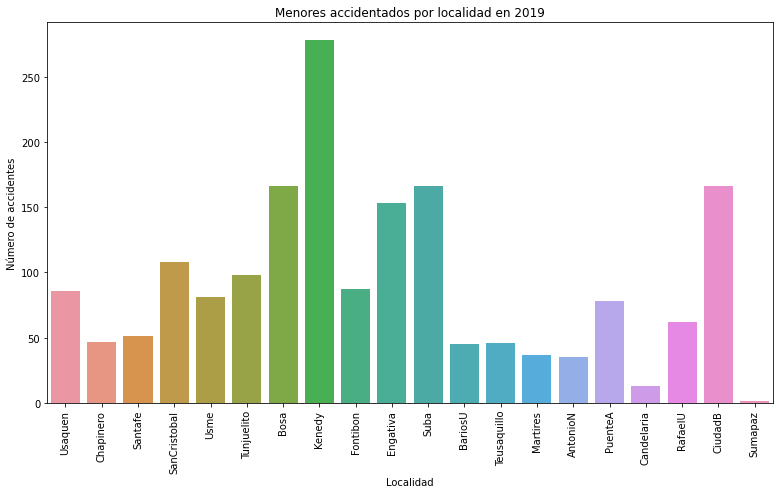

In [29]:
#Se revisa si el comportamiento de los siniestros por localidad coinciden también cuando solo se tienen menores en cuenta
menores = df.groupby(["NombreLocalidad"]).count()
menores = menores.rename_axis('NombreLocalidad').reset_index()
menores = menores.sort_values('CODIGO_ACCIDENTE')
plt.figure(figsize=(13,7)) 
sns.barplot(x = menores["NombreLocalidad"], y = menores["CODIGO_ACCIDENTE"],)
plt.ylabel("Número de accidentes") 
plt.xlabel("Localidad") 
plt.title("Menores accidentados por localidad en 2019");
plt.xticks(rotation=90);

In [30]:
#Se repite el merge pero en este caso para estduair la siniestralidad con bicicletas independiemte de la edad del actor, también en 2019
df4=pd.merge(df1, Bici2019, how='right', on=["CODIGO_ACCIDENTE", "FECHA", "AÑO", "MES"])
df4.head()

,CODIGO_ACCIDENTE,FECHA,HORA,CLASE_x,CHOQUE,OBJETO_FIJO,DIRECCION_x,CODIGO_LOCALIDAD,DISENO_LUGAR,AÑO,MES,NombreLocalidad,X,Y,OBJECTID,GRAVEDAD_y,CLASE_ACC,LATITUD,LONGITUD,CODIGO_CAUSA,VEHICULO,CLASE_y,SERVICIO,MODALIDAD,ENFUGA,ClaseVehiculo
0,10471956,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10471956-2,13.0,NaN,NaN,N,Bicicleta
1,10471994,2019-01-01,15:31:00,1.0,1.0,NaN,AV AVENIDA BOYACA-CL 26 2,9.0,1.0,2019,1,Fontibon,-74.111749,4.666027,349757.0,CON HERIDOS,CHOQUE,4.666027,-74.111749,97.0,10471994-1,13.0,NaN,NaN,N,Bicicleta
2,10472111,2019-01-01,19:14:00,1.0,1.0,NaN,AV AVENIDA PRIMERO DE MAYO-KR 51 2,16.0,1.0,2019,1,PuenteA,-74.122638,4.603364,337043.0,CON HERIDOS,CHOQUE,4.603364,-74.122638,99.0,10472111-2,13.0,NaN,NaN,N,Bicicleta
3,10484682,2019-01-01,09:45:00,1.0,1.0,NaN,CL 78-KR 80J S 2,7.0,1.0,2019,1,Bosa,-74.204817,4.610531,350274.0,CON HERIDOS,CHOQUE,4.610531,-74.204817,157.0,10484682-2,13.0,NaN,NaN,N,Bicicleta
4,10471902,2019-02-01,16:26:00,3.0,NaN,NaN,AV AVENIDA CIUDAD DE CALI-CL 13 2,9.0,1.0,2019,2,Fontibon,-74.135802,4.659373,311860.0,CON HERIDOS,VOLCAMIENTO,4.659373,-74.135802,97.0,10471902-1,13.0,NaN,NaN,N,Bicicleta


In [32]:
#Se continúa con el merge
df5=pd.merge(df4, actor, how='left', on=["CODIGO_ACCIDENTE", "FECHA", "AÑO", "MES"])
pd.set_option('max_columns', None)
df5

,CODIGO_ACCIDENTE,FECHA,HORA,CLASE_x,CHOQUE,OBJETO_FIJO,DIRECCION_x,CODIGO_LOCALIDAD,DISENO_LUGAR,AÑO,MES,NombreLocalidad,X,Y,OBJECTID,GRAVEDAD_y,CLASE_ACC,LATITUD,LONGITUD,CODIGO_CAUSA,VEHICULO_x,CLASE_y,SERVICIO,MODALIDAD,ENFUGA,ClaseVehiculo,CODIGO_ACCIDENTADO,CONDICION,ESTADO,EDAD,SEXO,VEHICULO_y
0,10471956,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10471956-2,13.0,NaN,NaN,N,Bicicleta,12604109,CONDUCTOR,ILESO,50,MASCULINO,10471956-1
1,10471956,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10471956-2,13.0,NaN,NaN,N,Bicicleta,12604110,CICLISTA,HERIDO,53,MASCULINO,10471956-2
2,10471956,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10471956-2,13.0,NaN,NaN,N,Bicicleta,12604113,PASAJERO/ACOMPAÑANTE,HERIDO,39,FEMENINO,10471956-1
3,10471994,2019-01-01,15:31:00,1.0,1.0,NaN,AV AVENIDA BOYACA-CL 26 2,9.0,1.0,2019,1,Fontibon,-74.111749,4.666027,349757.0,CON HERIDOS,CHOQUE,4.666027,-74.111749,97.0,10471994-1,13.0,NaN,NaN,N,Bicicleta,12604199,CICLISTA,HERIDO,41,MASCULINO,10471994-1
4,10471994,2019-01-01,15:31:00,1.0,1.0,NaN,AV AVENIDA BOYACA-CL 26 2,9.0,1.0,2019,1,Fontibon,-74.111749,4.666027,349757.0,CON HERIDOS,CHOQUE,4.666027,-74.111749,97.0,10471994-1,13.0,NaN,NaN,N,Bicicleta,12604200,MOTOCICLISTA,HERIDO,20,MASCULINO,10471994-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7516,10507225,2019-12-30,19:25:00,1.0,1.0,NaN,CL 48-KR 2B S 02,18.0,1.0,2019,12,RafaelU,-74.102016,4.551581,357721.0,CON HERIDOS,CHOQUE,4.551581,-74.102016,90.0,10507225-2,13.0,NaN,NaN,N,Bicicleta,12679876,CICLISTA,HERIDO,14,MASCULINO,10507225-2
7517,10507370,2019-12-31,10:40:00,1.0,1.0,NaN,KR 24-CL 70A 02,12.0,1.0,2019,12,BariosU,-74.068554,4.660663,317726.0,CON HERIDOS,CHOQUE,4.660663,-74.068554,157.0,10507370-2,13.0,NaN,NaN,N,Bicicleta,12680168,CONDUCTOR,ILESO,33,MASCULINO,10507370-1
7518,10507370,2019-12-31,10:40:00,1.0,1.0,NaN,KR 24-CL 70A 02,12.0,1.0,2019,12,BariosU,-74.068554,4.660663,317726.0,CON HERIDOS,CHOQUE,4.660663,-74.068554,157.0,10507370-2,13.0,NaN,NaN,N,Bicicleta,12680169,CICLISTA,HERIDO,21,MASCULINO,10507370-2
7519,10507448,2019-12-31,22:40:00,1.0,1.0,NaN,CL 138-KR 151 2,11.0,1.0,2019,12,Suba,-74.121877,4.746055,311084.0,SOLO DANOS,CHOQUE,4.746055,-74.121877,157.0,10507448-2,13.0,NaN,NaN,N,Bicicleta,12680330,MOTOCICLISTA,ILESO,43,MASCULINO,10507448-1


In [33]:
#Se elimina la columna repetida
DF = df5.drop(['VEHICULO_x'], axis=1)

In [34]:
#se renombran las variables y se eliminan duplicados
DF.rename(columns = {"CLASE_x": "CLASE_SIN", "CODIGO_LOCALIDAD": "LocCodigo", "VEHICULO_y": "VEHICULO", "CLASE_y": "CLASE_VEHI"}, inplace = True)
DF = DF.drop_duplicates(['CODIGO_ACCIDENTE'], keep='first')
DF

,CODIGO_ACCIDENTE,FECHA,HORA,CLASE_SIN,CHOQUE,OBJETO_FIJO,DIRECCION_x,LocCodigo,DISENO_LUGAR,AÑO,MES,NombreLocalidad,X,Y,OBJECTID,GRAVEDAD_y,CLASE_ACC,LATITUD,LONGITUD,CODIGO_CAUSA,CLASE_VEHI,SERVICIO,MODALIDAD,ENFUGA,ClaseVehiculo,CODIGO_ACCIDENTADO,CONDICION,ESTADO,EDAD,SEXO,VEHICULO
0,10471956,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,N,Bicicleta,12604109,CONDUCTOR,ILESO,50,MASCULINO,10471956-1
3,10471994,2019-01-01,15:31:00,1.0,1.0,NaN,AV AVENIDA BOYACA-CL 26 2,9.0,1.0,2019,1,Fontibon,-74.111749,4.666027,349757.0,CON HERIDOS,CHOQUE,4.666027,-74.111749,97.0,13.0,NaN,NaN,N,Bicicleta,12604199,CICLISTA,HERIDO,41,MASCULINO,10471994-1
8,10472111,2019-01-01,19:14:00,1.0,1.0,NaN,AV AVENIDA PRIMERO DE MAYO-KR 51 2,16.0,1.0,2019,1,PuenteA,-74.122638,4.603364,337043.0,CON HERIDOS,CHOQUE,4.603364,-74.122638,99.0,13.0,NaN,NaN,N,Bicicleta,12604390,CONDUCTOR,ILESO,22,MASCULINO,10472111-1
10,10484682,2019-01-01,09:45:00,1.0,1.0,NaN,CL 78-KR 80J S 2,7.0,1.0,2019,1,Bosa,-74.204817,4.610531,350274.0,CON HERIDOS,CHOQUE,4.610531,-74.204817,157.0,13.0,NaN,NaN,N,Bicicleta,12631411,CONDUCTOR,ILESO,28,MASCULINO,10484682-1
12,10471902,2019-02-01,16:26:00,3.0,NaN,NaN,AV AVENIDA CIUDAD DE CALI-CL 13 2,9.0,1.0,2019,2,Fontibon,-74.135802,4.659373,311860.0,CON HERIDOS,VOLCAMIENTO,4.659373,-74.135802,97.0,13.0,NaN,NaN,N,Bicicleta,12603990,CICLISTA,HERIDO,21,MASCULINO,10471902-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7501,10507367,2019-12-30,17:00:00,1.0,1.0,NaN,CL 43BIS-KR 78 S 2,8.0,1.0,2019,12,Kenedy,-74.161514,4.611783,315861.0,CON HERIDOS,CHOQUE,4.611783,-74.161514,133.0,13.0,NaN,NaN,N,Bicicleta,12680160,MOTOCICLISTA,ILESO,22,MASCULINO,10507367-1
7503,10507391,2019-12-30,12:15:00,1.0,1.0,NaN,CL 80-KR 30 2,12.0,1.0,2019,12,BariosU,-74.067495,4.673883,315871.0,CON HERIDOS,CHOQUE,4.673883,-74.067495,121.0,13.0,NaN,NaN,N,Bicicleta,12680208,CONDUCTOR,ILESO,51,MASCULINO,10507391-1
7515,10507225,2019-12-30,19:25:00,1.0,1.0,NaN,CL 48-KR 2B S 02,18.0,1.0,2019,12,RafaelU,-74.102016,4.551581,357721.0,CON HERIDOS,CHOQUE,4.551581,-74.102016,90.0,13.0,NaN,NaN,N,Bicicleta,12679875,CONDUCTOR,ILESO,42,MASCULINO,10507225-1
7517,10507370,2019-12-31,10:40:00,1.0,1.0,NaN,KR 24-CL 70A 02,12.0,1.0,2019,12,BariosU,-74.068554,4.660663,317726.0,CON HERIDOS,CHOQUE,4.660663,-74.068554,157.0,13.0,NaN,NaN,N,Bicicleta,12680168,CONDUCTOR,ILESO,33,MASCULINO,10507370-1


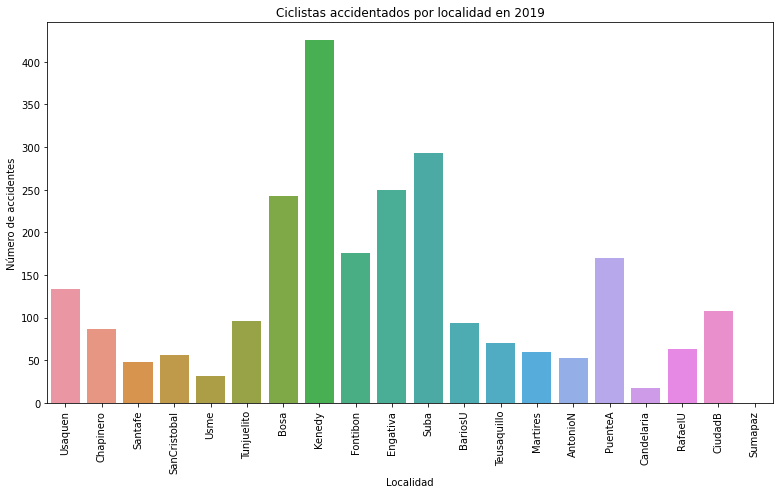

In [35]:
#Se revisa si el comportamiento de los siniestros por localidad para las bicicletas tienen la misma dinámica 
bicicletas = DF.groupby(["NombreLocalidad"]).count()
bicicletas = bicicletas.rename_axis('NombreLocalidad').reset_index()
bicicletas = bicicletas.sort_values('CODIGO_ACCIDENTE')
plt.figure(figsize=(13,7)) 
sns.barplot(x = bicicletas["NombreLocalidad"], y = bicicletas["CODIGO_ACCIDENTE"],)
plt.ylabel("Número de accidentes") 
plt.xlabel("Localidad") 
plt.title("Ciclistas accidentados por localidad en 2019");
plt.xticks(rotation=90);

In [ ]:
#Se exporta esta base para trabajar en Qgis
DF.to_csv('~/Desktop/PROYECTO MCPP/Parte de Pyhton/bicicletas2019Geocodificado.csv', index = True)